<h1>Linear Regression<h1>

Linear regression is a supervised machine learning algorithm used to predict a numerical value given a set of features or independent variables. It is a type of regression analysis that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The linear regression algorithm is used to uncover the correlation between variables and predict future outcomes. It is used in a wide range of applications, such as predicting housing prices, analyzing risk in financial markets, and forecasting sales and demand.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,area,price
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [4]:
x=np.array(df['area']) #independent variable
y=np.array(df['price']) #dependent variable

In [5]:
np.vstack((x,y))

array([[  8450,   9600,  11250, ...,   9042,   9717,   9937],
       [208500, 181500, 223500, ..., 266500, 142125, 147500]], dtype=int64)

<h1>Manual Method<h1>

Formula :<br>
<pre style="font-family:verdana;">Main Equation : y=a+bx (which is much similar to the straight line equation y=mx+c)<br>
    here b is called the coefficient<br>
         a is called the intercept<br><br>
    To find b : b=r*(std(y)/std(x))<br>
    where r=(sum((x-x_mean)*(y-y_mean))/sqrt(sum(x-x_mean)**2 * sum(y-y_mean)**2)))<br><br>
    To find a : a=b*x_mean-y_mean
</pre>    

In [6]:
x_mean=np.mean(x)
y_mean=np.mean(y)
numerator=0
denominator_x=0
denominator_y=0
for i in range(len(x)):
    numerator+=(x[i]-x_mean)*(y[i]-y_mean)
    denominator_x+=(x[i]-x_mean)**2
    denominator_y+=(y[i]-y_mean)**2
r=numerator/np.sqrt(denominator_x*denominator_y)

In [7]:
b=r*(np.std(y)/np.std(x))

In [8]:
a=b*x_mean-y_mean

In [9]:
y=a+b*x

In [10]:
def predict(x_value):
    return a+b*x_value  #formula for the final equation

In [11]:
manual_predict_value=[]
for i in range(len(x)):
    manual_predict_value.append(predict(x[i])) 

<h1>Using the sklearn library<h1>

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(pd.DataFrame(x),y)  #training the model
model_predict_value=model.predict(pd.DataFrame(x))    #testing the model

<h3>Comparing the manual value with the library model value<h3>

In [13]:
predict={'manul_predict':manual_predict_value,'model_predict':model_predict_value}
result=pd.DataFrame(predict,columns=predict.keys())

In [14]:
result.head()

,manul_predict,model_predict
0,-141091.388905,-141091.388905
1,-138676.421160,-138676.421160
2,-135211.467440,-135211.467440
3,-138781.419758,-138781.419758
4,-128890.551866,-128890.551866


<h1>Visualization<h1> 

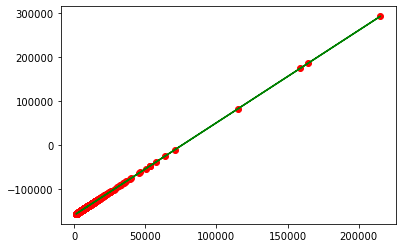

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x,y,c='r')
plt.plot(x,manual_predict_value,c='g')